In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
# Set Eager API
tf.enable_eager_execution()
tfe = tf.contrib.eager

In [3]:
# Training Data
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

# Parameters
learning_rate = 0.01
display_step = 100
num_steps = 1000

In [4]:
# Weight and Bias
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

# Linear regression (Wx + b)
def linear_regression(inputs):
    return inputs * W + b

# Mean square error
def mean_square_fn(model_fn, inputs, labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2))/ (2 * n_samples)

In [5]:
# SGD Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# COmpute Gradients
grad = tfe.implicit_gradients(mean_square_fn)

Initial cost= 125.259895325 W= -2.0981035 b= 0.59956414
Epoch: 0001 cost= 37.724395752 W= -1.0451775 b= 0.7479217
Epoch: 0100 cost= 0.077744544 W= 0.23544261 b= 0.9135976
Epoch: 0200 cost= 0.077568658 W= 0.23729452 b= 0.90046835
Epoch: 0300 cost= 0.077430665 W= 0.23893465 b= 0.8888406
Epoch: 0400 cost= 0.077322431 W= 0.2403872 b= 0.8785426
Epoch: 0500 cost= 0.077237554 W= 0.24167362 b= 0.8694225
Epoch: 0600 cost= 0.077170976 W= 0.24281289 b= 0.8613456
Epoch: 0700 cost= 0.077118762 W= 0.24382189 b= 0.8541922
Epoch: 0800 cost= 0.077077799 W= 0.24471548 b= 0.84785706
Epoch: 0900 cost= 0.077045672 W= 0.24550687 b= 0.84224653
Epoch: 1000 cost= 0.077020466 W= 0.24620783 b= 0.83727694


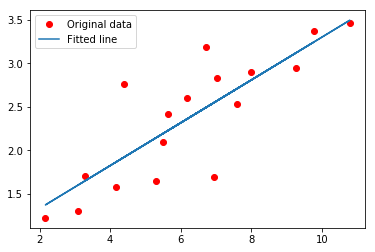

In [6]:
# Initial cost, before optimizing
print("Initial cost= {:.9f}".format(
    mean_square_fn(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

# Training
for step in range(num_steps):
    
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    
    if (step + 1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

        # Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()